In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

raw = pd.read_csv('Backtest.csv')

df = raw.T
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df.rename

# Convert the numeric columns to float
numeric_columns = ['PnL', 'Fitness', 'TR', 'std(RR)', 'MDD', 'Win Rate', 'nTrade']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

strategy_mapping = {
    '0.002': 'STS1',
    '0.004': 'STS2',
    '0.005': 'STS3',
    '0.008': 'STS4'
}

data = df[df['Currency']=='EURNZD'].copy()

for threshold, strategy in strategy_mapping.items():
    data.loc[data['Threshold'] == threshold, 'Strategy'] = strategy

avg_dict = dict()
        
def update_strategy_dict(df, strategy_dict):
    for strategy in df['Strategy'].unique():
        sub_df = df[df['Strategy']==strategy]
        strategy_dict.update({
            strategy: [
                np.mean(sub_df['PnL']), np.mean(sub_df['Fitness']),
                np.mean(sub_df['TR']), np.mean(sub_df['std(RR)']),
                np.mean(sub_df['MDD']), np.mean(sub_df['Win Rate']),
                np.mean(sub_df['nTrade'])
            ]
        })

update_strategy_dict(data, avg_dict)

avgdf = pd.DataFrame(avg_dict)
avgdf['Index'] = ['PnL','Fitness','TR','std(RR)','MDD','Win Rate','nTrade']
avgdf.set_index('Index', inplace=True)

In [31]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for 'TR', 'MDD', and 'Win Rate' columns for each strategy
selected_cols = ['TR', 'MDD', 'Win Rate']
strategies_USDCAD = data['Strategy'].unique()
skew_kurt_strategy_USDCAD = pd.DataFrame(columns=['Strategy', 'Column', 'Skewness', 'Kurtosis'])
for strategy in strategies_USDCAD:
    strategy_data = data[data['Strategy'] == strategy]
    for col in selected_cols:
        skew_val = skew(strategy_data[col].dropna())
        kurt_val = kurtosis(strategy_data[col].dropna())
        skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
            'Strategy': strategy,
            'Column': col,
            'Skewness': skew_val,
            'Kurtosis': kurt_val
        }, ignore_index=True)

# Pivot the table for a better view
summary_table_USDCAD = skew_kurt_strategy_USDCAD.pivot_table(index='Strategy', columns='Column', values=['Skewness', 'Kurtosis'])
summary_table_USDCAD.columns = ['_'.join(col).strip() for col in summary_table_USDCAD.columns.values]
summary_table_USDCAD.reset_index(inplace=True)

# Display the summary table
summary_table_USDCAD

/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14608/2062129970.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14608/2062129970.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14608/2062129970.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14608/2062129970.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

,Strategy,Kurtosis_MDD,Kurtosis_TR,Kurtosis_Win Rate,Skewness_MDD,Skewness_TR,Skewness_Win Rate
0,B&H,-0.542454,-1.209422,-1.500000,0.910208,-0.469796,-0.707107
1,MACD,-0.901258,-1.352363,-0.463490,0.594718,-0.242541,-0.557887
2,MTS,-1.464603,-0.665236,-0.893561,0.050960,-0.710493,-0.700589
3,MTSGA,-0.928958,0.962369,-0.743401,-0.607977,-0.836277,-0.017146
4,RSI,-0.720786,-0.749692,-1.131210,0.541100,0.137068,0.144990
5,STS1,1.327630,-1.414980,-1.389538,1.161712,-0.151258,-0.438598
6,STS2,2.125710,-1.059154,-0.273661,1.877718,0.331943,0.304348
7,STS3,6.718616,-0.797714,-1.419373,2.917135,0.309558,0.160676
8,STS4,5.258758,0.404131,0.510704,-2.499094,-0.866935,-0.112854


In [32]:
avgdf

,B&H,RSI,MACD,STS1,STS2,STS3,STS4,MTS,MTSGA
Index,,,,,,,,,
PnL,-134.833333,-1850.750000,-3735.833333,-4299.166667,-395.000000,-368.333333,768.500000,-297.500000,114.166667
Fitness,-0.003050,-0.012125,-0.022925,-0.026317,-0.002858,-0.002617,0.003983,-0.002242,0.000083
TR,-0.000533,-0.011150,-0.022417,-0.025767,-0.002292,-0.002067,0.004700,-0.001725,0.000625
std(RR),NaN,0.002450,0.002083,0.001658,0.002917,0.003050,0.006555,0.002050,0.001917
MDD,0.025100,0.009733,0.005208,0.005475,0.005650,0.005258,0.007208,0.005108,0.005358
Win Rate,0.666667,0.522833,0.273933,0.358617,0.465825,0.435292,0.515083,0.425842,0.444208
nTrade,1.000000,46.000000,74.916667,72.750000,16.833333,10.250000,4.166667,47.916667,51.750000


In [33]:
# Calculating descriptive statistics based on different strategies
strategy_stats = data.groupby("Strategy").describe()

# Transposing the dataframe for better readability
strategy_stats.transpose()

Strategy                  B&H         MACD          MTS        MTSGA  \
Unnamed: 0                                                             
PnL        count    12.000000    12.000000    12.000000    12.000000   
           mean   -134.833333 -3735.833333  -297.500000   114.166667   
           std    4055.726699  3670.425832  3569.148727  3915.282988   
           min   -6747.000000 -9567.000000 -7190.000000 -9126.000000   
           25%   -3393.500000 -7256.500000 -2624.500000 -1716.500000   
           50%     699.500000 -2272.500000   838.500000   839.500000   
           75%    3628.000000 -1303.250000  2152.750000  2048.500000   
           max    4210.000000  1655.000000  4234.000000  6358.000000   
Fitness    count    12.000000    12.000000    12.000000    12.000000   
           mean     -0.003050    -0.022925    -0.002242     0.000083   
           std       0.025558     0.022091     0.021740     0.024086   
           min      -0.044300    -0.056900    -0.045000    -0.057400   
           25%      -0.022825    -0.044025    -0.016100    -0.010900   
           50%       0.002500    -0.013950     0.004450     0.004550   
           75%       0.020450    -0.008100     0.012900     0.011675   
           max       0.024300     0.009600     0.025900     0.038600   
TR         count    12.000000    12.000000    12.000000    12.000000   
           mean     -0.000533    -0.022417    -0.001725     0.000625   
           std       0.024406     0.022115     0.021802     0.024073   
           min      -0.040200    -0.056600    -0.044600    -0.056700   
           25%      -0.019925    -0.043700    -0.015625    -0.010350   
           50%       0.004200    -0.013350     0.005100     0.005100   
           75%       0.022650    -0.007475     0.013350     0.012250   
           max       0.025500     0.009900     0.026400     0.039100   
std(RR)    count     0.000000    12.000000    12.000000    12.000000   
           mean           NaN     0.002083     0.002050     0.001917   
           std            NaN     0.000393     0.000348     0.000482   
           min            NaN     0.001600     0.001500     0.001400   
           25%            NaN     0.001800     0.001700     0.001575   
           50%            NaN     0.002050     0.002100     0.001800   
           75%            NaN     0.002175     0.002225     0.002200   
           max            NaN     0.003000     0.002700     0.002700   
MDD        count    12.000000    12.000000    12.000000    12.000000   
           mean      0.025100     0.005208     0.005108     0.005358   
           std       0.013222     0.002110     0.001229     0.001274   
           min       0.010200     0.002600     0.003600     0.003100   
           25%       0.016250     0.003375     0.003925     0.004775   
           50%       0.020800     0.004750     0.005250     0.005550   
           75%       0.029525     0.006375     0.006200     0.006275   
           max       0.051500     0.008900     0.006800     0.006800   
Win Rate   count    12.000000    12.000000    12.000000    12.000000   
           mean      0.666667     0.273933     0.425842     0.444208   
           std       0.492366     0.062619     0.101462     0.087323   
           min       0.000000     0.159100     0.232100     0.290700   
           25%       0.000000     0.248600     0.341775     0.387225   
           50%       1.000000     0.284200     0.464100     0.457950   
           75%       1.000000     0.310575     0.489925     0.489550   
           max       1.000000     0.366700     0.538500     0.594600   
nTrade     count    12.000000    12.000000    12.000000    12.000000   
           mean      1.000000    74.916667    47.916667    51.750000   
           std       0.000000    20.165039    16.222646    18.101356   
           min       1.000000    45.000000    26.000000    24.000000   
           25%       1.000000    58.750000    37.500000    38.500000   
           50%       1.000000    71.0000

# box-plot

In [34]:
# Define a function to analyze a given column
from scipy import stats

def analyze_column(data, column):
    strategies = data['Strategy'].unique()

    # Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Strategy', y=column, data=data)
    plt.title(f'Boxplot of {column} by Strategy')
    plt.show()

    # ANOVA
    group_data = [data[data['Strategy'] == strategy][column].values for strategy in strategies]
    f_val, p_val = stats.f_oneway(*group_data)
    print(f"ANOVA for {column}: F={f_val}, p={p_val}")

    # Skewness and Kurtosis
    for strategy in strategies:
        skewness = stats.skew(data[data['Strategy'] == strategy][column])
        kurtosis = stats.kurtosis(data[data['Strategy'] == strategy][column])
        print(f"For {strategy}, {column}: skewness={skewness}, kurtosis={kurtosis}")


=== Analysis for Fitness ===


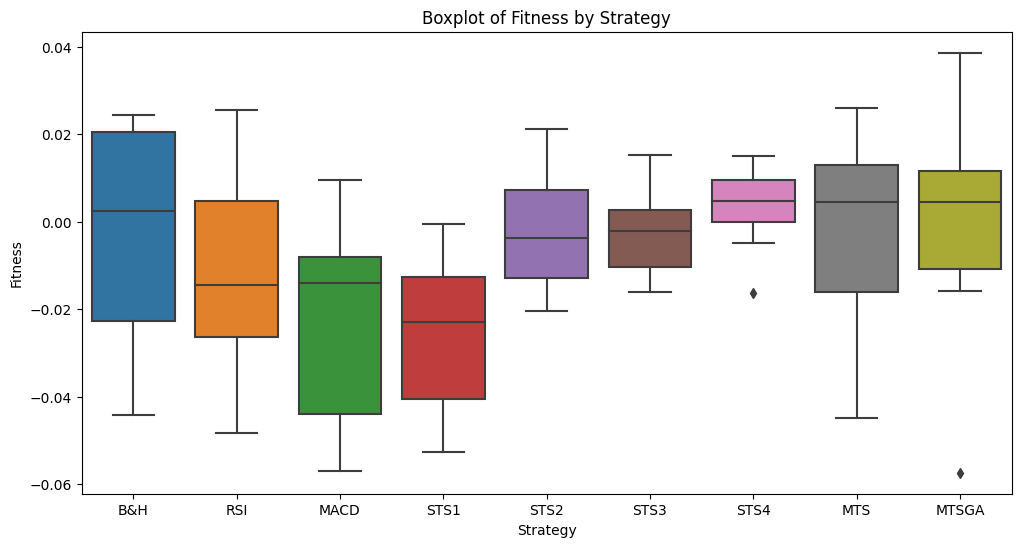

ANOVA for Fitness: F=3.667508450006389, p=0.0008785254842148214
For B&H, Fitness: skewness=-0.503066839141466, kurtosis=-1.1863289330093902
For RSI, Fitness: skewness=0.12742466656154192, kurtosis=-0.7364757507532005
For MACD, Fitness: skewness=-0.22807486712994576, kurtosis=-1.3517962693663996
For STS1, Fitness: skewness=-0.14097634109519575, kurtosis=-1.4211890921347279
For STS2, Fitness: skewness=0.33198804367573004, kurtosis=-1.0523548868131776
For STS3, Fitness: skewness=0.3050397072020108, kurtosis=-0.8175145597285778
For STS4, Fitness: skewness=-0.8547835701052476, kurtosis=0.3602588944863232
For MTS, Fitness: skewness=-0.7076029838259041, kurtosis=-0.6642100939250817
For MTSGA, Fitness: skewness=-0.8433265840952364, kurtosis=0.9899431379567978


In [35]:
print(f"\n=== Analysis for Fitness ===")
analyze_column(data, 'Fitness')


=== Analysis for TR ===


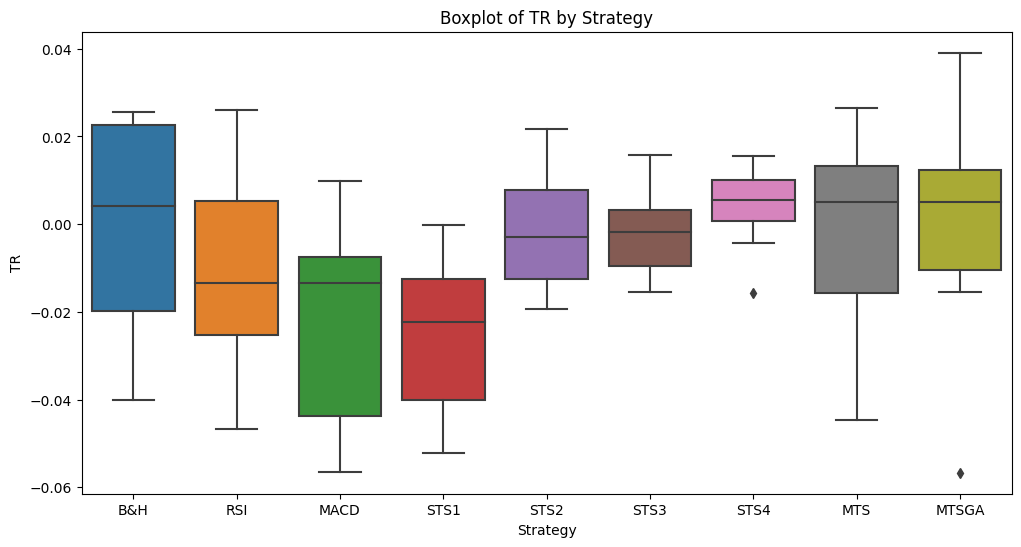

ANOVA for TR: F=3.8376118433322555, p=0.0005731866700486721
For B&H, TR: skewness=-0.46979641590897786, kurtosis=-1.209422347263535
For RSI, TR: skewness=0.13706849145711972, kurtosis=-0.749691939680472
For MACD, TR: skewness=-0.2425411875128872, kurtosis=-1.3523629160577313
For STS1, TR: skewness=-0.15125771797079615, kurtosis=-1.4149803411845572
For STS2, TR: skewness=0.3319434616521727, kurtosis=-1.0591541134136444
For STS3, TR: skewness=0.3095584182034142, kurtosis=-0.7977136709330535
For STS4, TR: skewness=-0.8669348641883824, kurtosis=0.404130558441091
For MTS, TR: skewness=-0.7104933643047265, kurtosis=-0.6652363212257644
For MTSGA, TR: skewness=-0.8362765831192943, kurtosis=0.9623690418409532


In [36]:
print(f"\n=== Analysis for TR ===")
analyze_column(data, 'TR')


=== Analysis for MDD ===


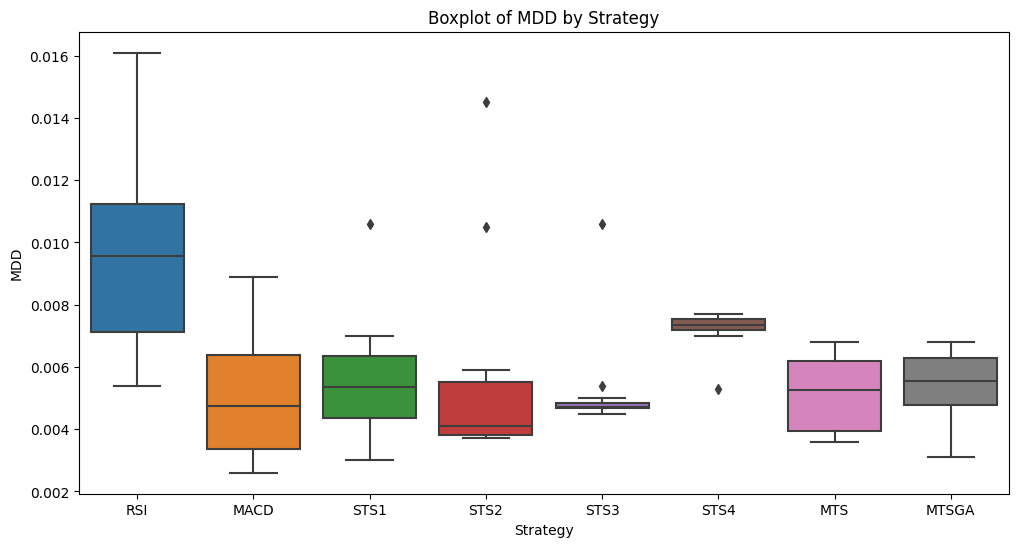

ANOVA for MDD: F=6.583268734407777, p=2.944030303045243e-06
For RSI, MDD: skewness=0.5410999162009342, kurtosis=-0.7207858207715199
For MACD, MDD: skewness=0.5947179412494754, kurtosis=-0.9012575790632349
For STS1, MDD: skewness=1.161711538687354, kurtosis=1.3276295892308845
For STS2, MDD: skewness=1.8777175246951887, kurtosis=2.1257102920056736
For STS3, MDD: skewness=2.917134662949884, kurtosis=6.718615808640461
For STS4, MDD: skewness=-2.4990943108773562, kurtosis=5.258757618991986
For MTS, MDD: skewness=0.050959508548368795, kurtosis=-1.4646028220369658
For MTSGA, MDD: skewness=-0.6079770639304707, kurtosis=-0.9289583756113617


In [37]:
print(f"\n=== Analysis for MDD ===")
analyze_column(data[data['Strategy']!='B&H'], 'MDD')


=== Analysis for MDD ===


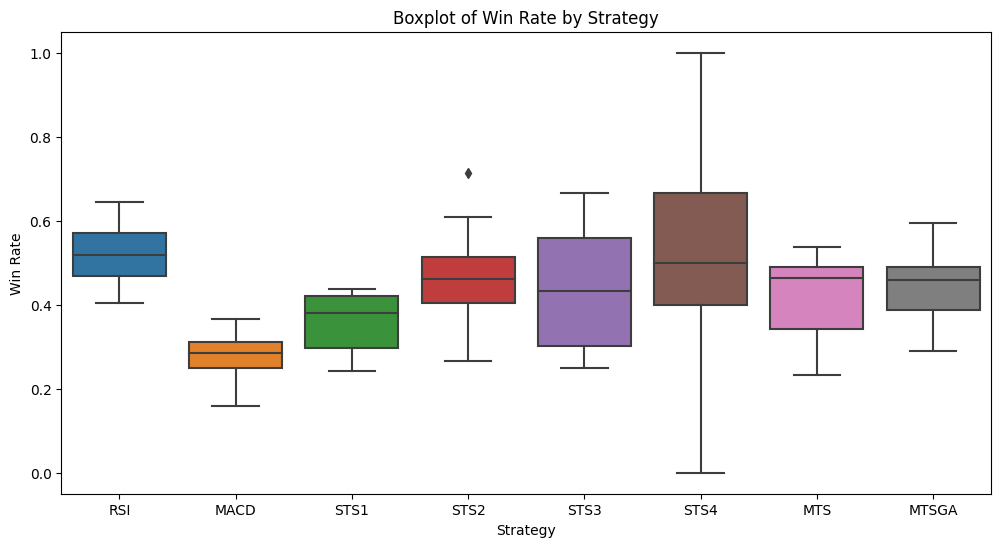

ANOVA for Win Rate: F=4.8540849992683635, p=0.00011626344316607406
For RSI, Win Rate: skewness=0.14499016519670097, kurtosis=-1.1312104281055364
For MACD, Win Rate: skewness=-0.5578867479933522, kurtosis=-0.46349042217235015
For STS1, Win Rate: skewness=-0.438598034358677, kurtosis=-1.389538144360724
For STS2, Win Rate: skewness=0.304348270661389, kurtosis=-0.2736613298632653
For STS3, Win Rate: skewness=0.1606763704429209, kurtosis=-1.4193727206303226
For STS4, Win Rate: skewness=-0.11285373843076707, kurtosis=0.5107035794906913
For MTS, Win Rate: skewness=-0.7005894844766473, kurtosis=-0.8935609854587652
For MTSGA, Win Rate: skewness=-0.017145681209314315, kurtosis=-0.7434008248337429


In [38]:
print(f"\n=== Analysis for MDD ===")
analyze_column(data[data['Strategy']!='B&H'], 'Win Rate')

# Avg, Skewness, and Kurtosis

## PnL

In [39]:
avgdf

,B&H,RSI,MACD,STS1,STS2,STS3,STS4,MTS,MTSGA
Index,,,,,,,,,
PnL,-134.833333,-1850.750000,-3735.833333,-4299.166667,-395.000000,-368.333333,768.500000,-297.500000,114.166667
Fitness,-0.003050,-0.012125,-0.022925,-0.026317,-0.002858,-0.002617,0.003983,-0.002242,0.000083
TR,-0.000533,-0.011150,-0.022417,-0.025767,-0.002292,-0.002067,0.004700,-0.001725,0.000625
std(RR),NaN,0.002450,0.002083,0.001658,0.002917,0.003050,0.006555,0.002050,0.001917
MDD,0.025100,0.009733,0.005208,0.005475,0.005650,0.005258,0.007208,0.005108,0.005358
Win Rate,0.666667,0.522833,0.273933,0.358617,0.465825,0.435292,0.515083,0.425842,0.444208
nTrade,1.000000,46.000000,74.916667,72.750000,16.833333,10.250000,4.166667,47.916667,51.750000


In [40]:
unique_strategies = data['Strategy'].unique()

# Calculate skewness and kurtosis for PnL for each strategy
skewness_kurtosis = {strategy: {"skewness": stats.skew(data[data['Strategy'] == strategy]['PnL']),
                                 "kurtosis": stats.kurtosis(data[data['Strategy'] == strategy]['PnL'])} 
                     for strategy in unique_strategies}
skewness_kurtosis


{'B&H': {'skewness': -0.4795897422051, 'kurtosis': -1.2106413984528275},
 'RSI': {'skewness': 0.18823615500683347, 'kurtosis': -0.7931747145367929},
 'MACD': {'skewness': -0.248114502328731, 'kurtosis': -1.3165793706737716},
 'STS1': {'skewness': -0.1676253287102998, 'kurtosis': -1.378266378716475},
 'STS2': {'skewness': 0.30072207418040725, 'kurtosis': -1.0712811486279323},
 'STS3': {'skewness': 0.270373538961099, 'kurtosis': -0.840234660180089},
 'STS4': {'skewness': -0.843135222222357, 'kurtosis': 0.3878828263111629},
 'MTS': {'skewness': -0.6973613193511957, 'kurtosis': -0.736910903004254},
 'MTSGA': {'skewness': -0.8010958796879626, 'kurtosis': 0.8566381699106311}}

1. Profitability: The MTSGA strategy shows a positive average PnL, suggesting that it has been profitable on average during the period covered by the data.


2. Risk and Return Distribution: The positive skewness indicates that the MTSGA strategy has a distribution with a long tail in the positive direction. This can be interpreted as the strategy having a tendency for exceptionally good outcomes, albeit rarely. The positive kurtosis suggests that the PnL distribution for MTSGA has heavier tails and a sharper peak than a normal distribution, meaning that while most results will be close to the average, extreme outcomes (both good and bad) are more likely than they would be in a normally distributed scenario.


3. Comparison with Other Strategies: While the ANOVA test did not find significant evidence to suggest that the average PnL differs between strategies, the p-value was close to the threshold, indicating that there might be some differences between strategies. Further investigation or testing with a larger dataset might provide more definitive insights.

# PnL
## Hist

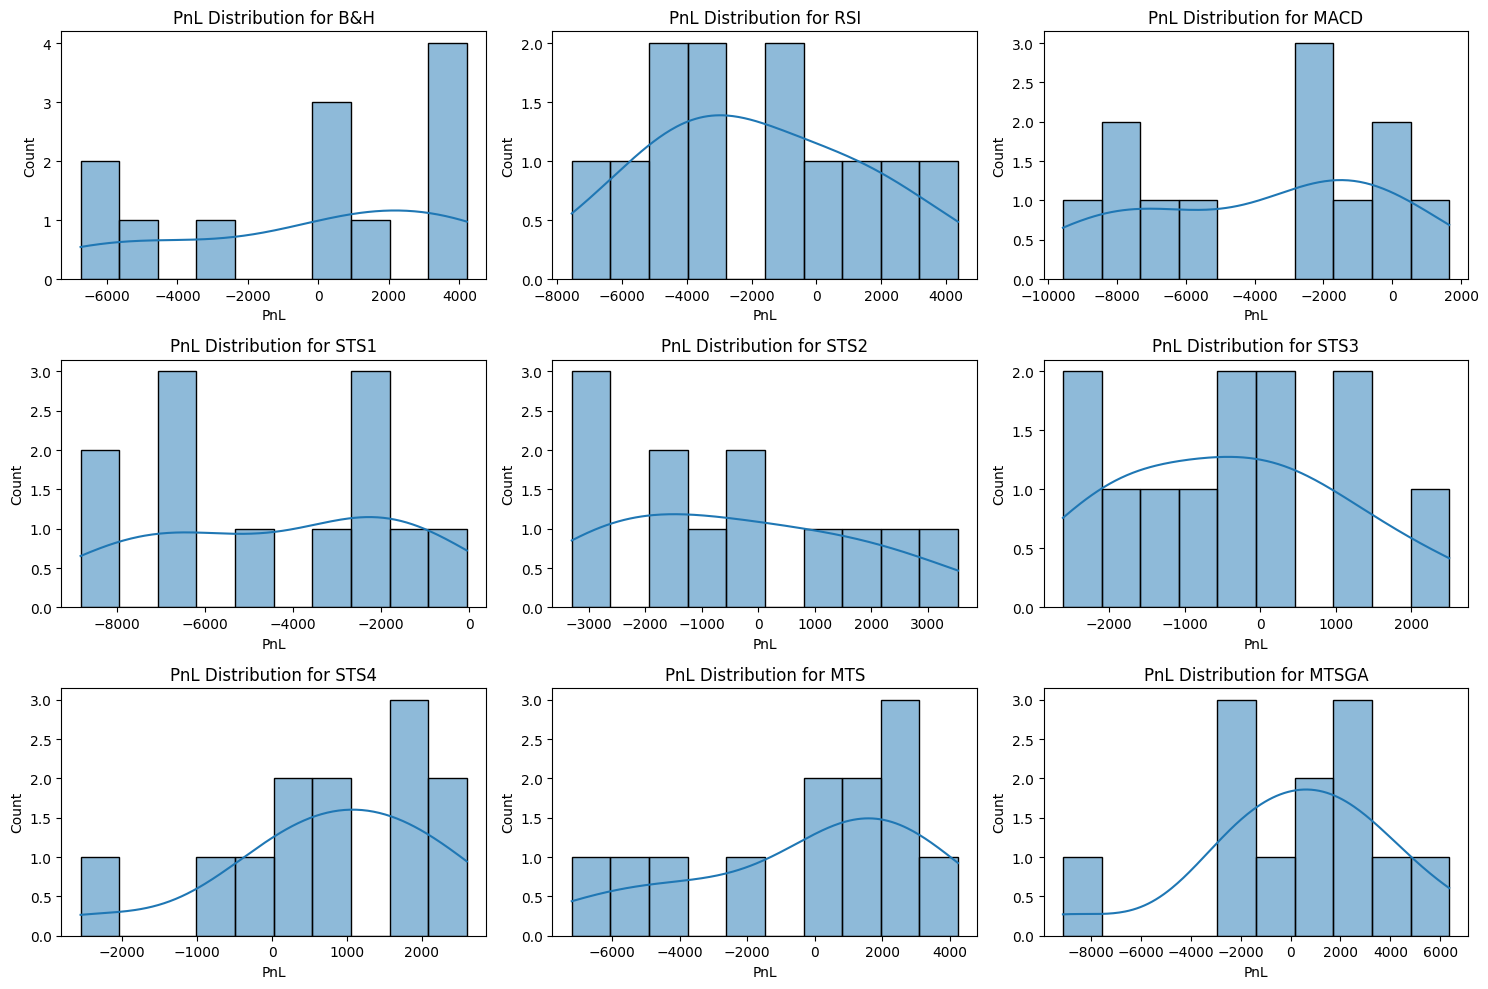

In [41]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['PnL'], bins=10, kde=True)
    plt.title(f'PnL Distribution for {strategy}')

plt.tight_layout()
plt.show()

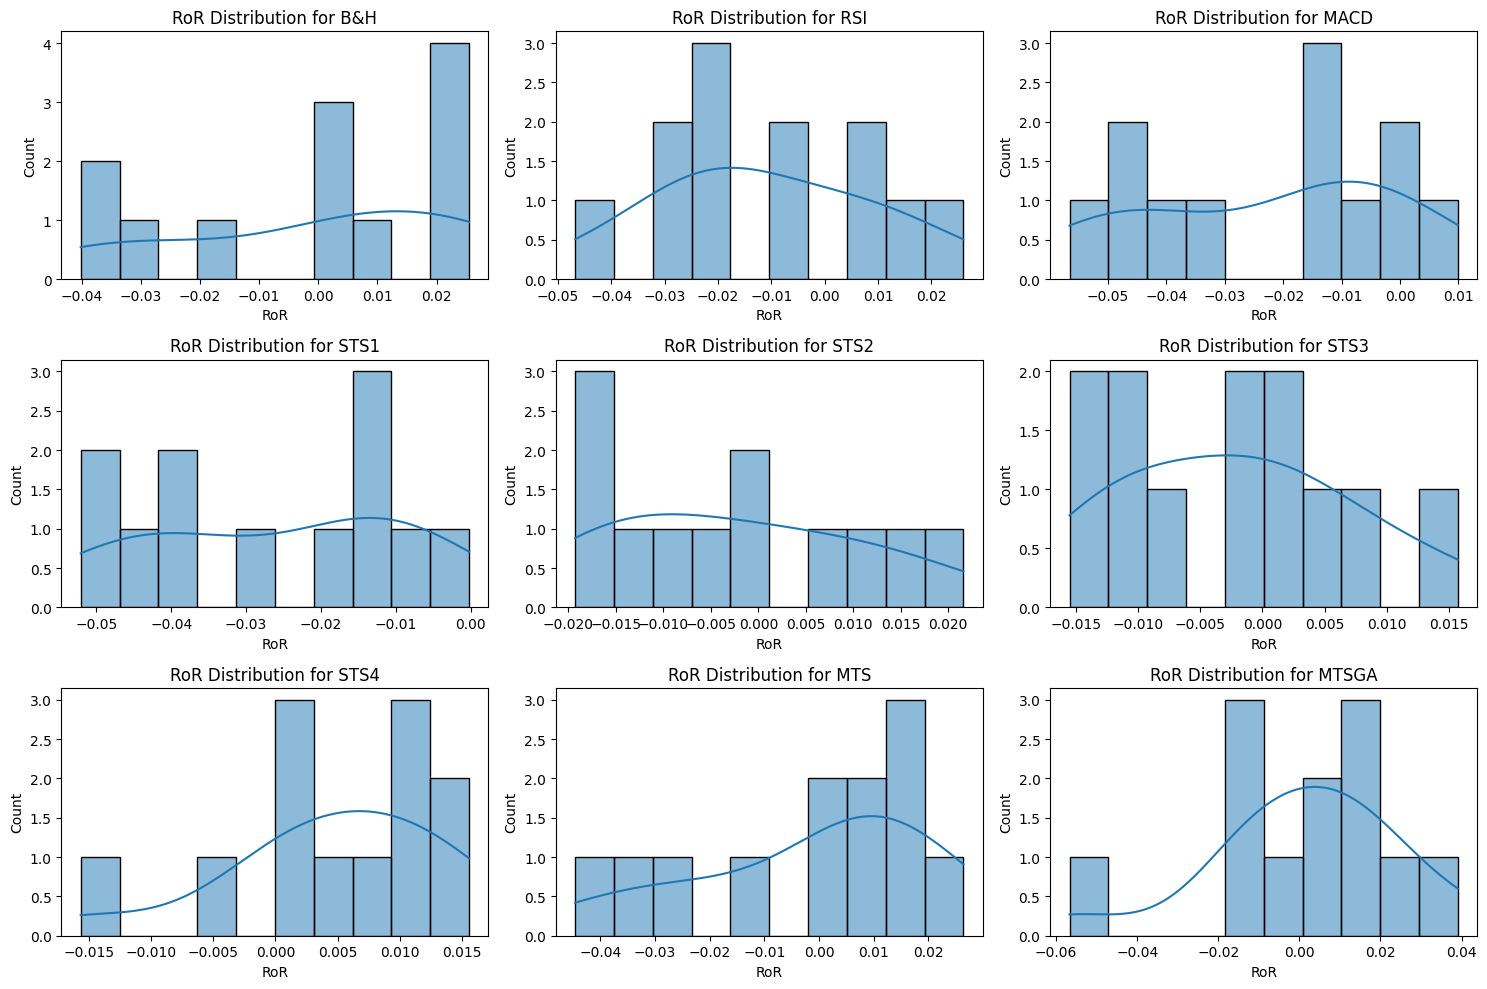

In [42]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['TR'], bins=10, kde=True)
    plt.title(f'RoR Distribution for {strategy}')
    plt.xlabel('RoR')

plt.tight_layout()
plt.show()

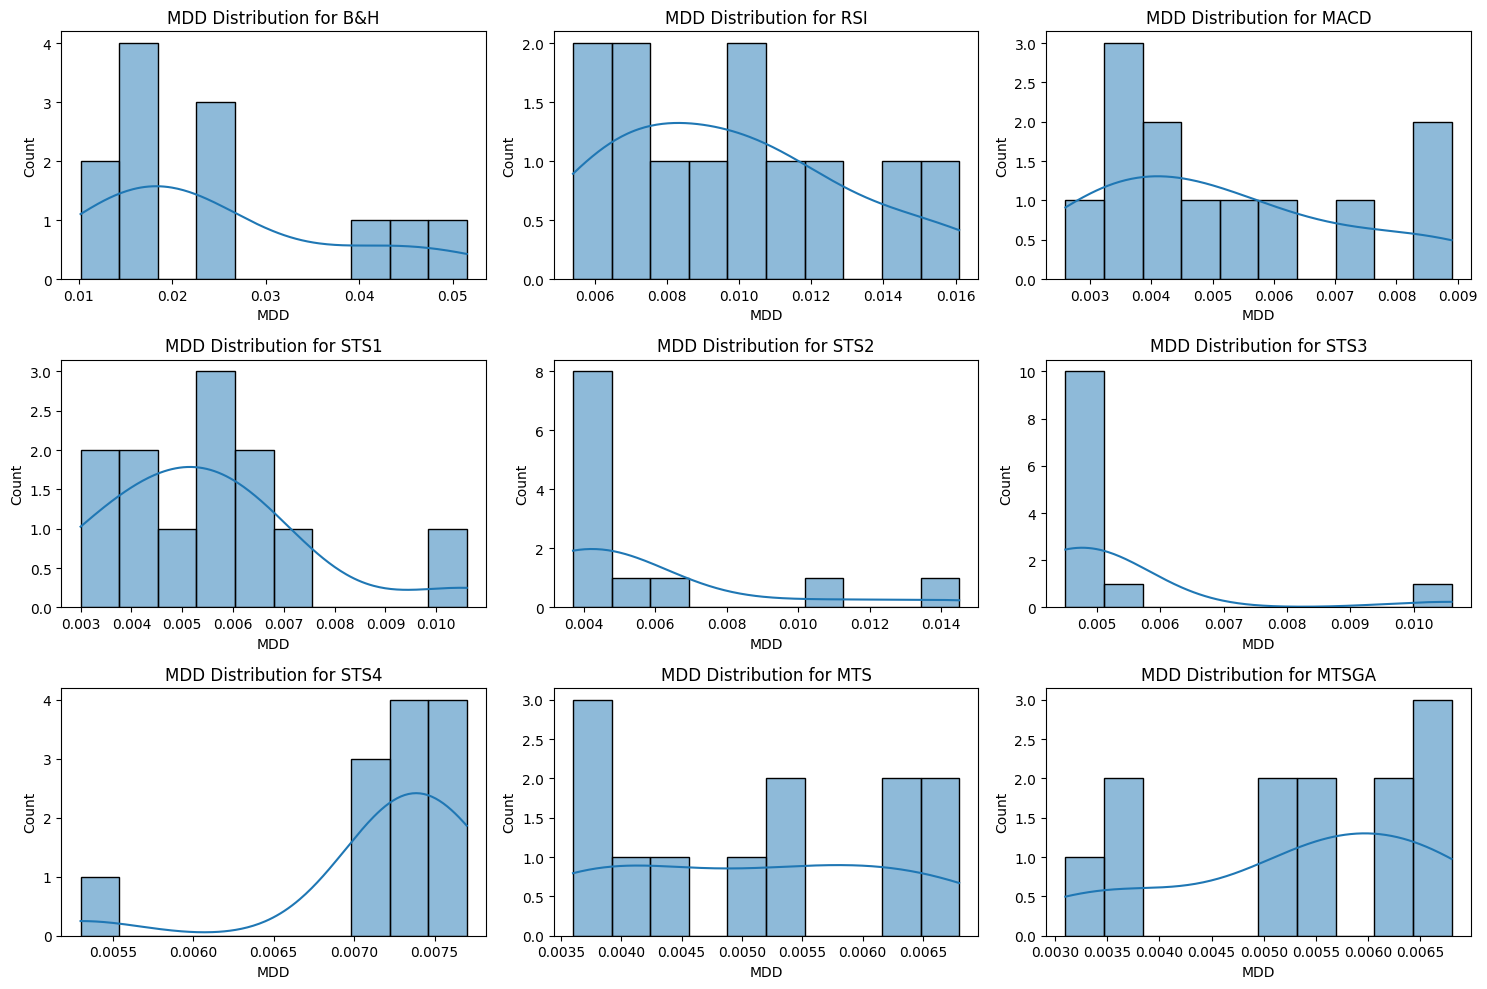

In [43]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['MDD'], bins=10, kde=True)
    plt.title(f'MDD Distribution for {strategy}')
    plt.xlabel('MDD')

plt.tight_layout()
plt.show()

In [44]:
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['PnL'] for strategy in unique_strategies])
kruskal_result

KruskalResult(statistic=25.583242828267473, pvalue=0.0012373320897702499)

## Kruskal-Wallis

In [45]:
# Perform Kruskal-Wallis test
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['PnL'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=25.583242828267473, pvalue=0.0012373320897702499)

## M-W U Test

The Mann-Whitney U test is a non-parametric test that can be used to compare two independent samples. However, please note that performing multiple tests increases the likelihood of Type I errors (false positives), so a correction method such as the Bonferroni correction is usually applied to control the family-wise error rate.

In [46]:
from scipy.stats import mannwhitneyu
from itertools import combinations

# Get all combinations of strategies
strategy_combinations = list(combinations(unique_strategies, 2))

# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['PnL'], 
                           data[data['Strategy'] == group2]['PnL'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')


,Group1,Group2,Statistic,p-value
0,STS1,STS4,6.0,0.005609
0,STS1,STS3,15.0,0.039822
0,MACD,STS4,17.0,0.059473
0,STS1,STS2,22.5,0.167766
0,STS1,MTSGA,24.0,0.219562
0,STS1,MTS,27.0,0.366952
0,B&H,STS1,116.0,0.432822
0,MACD,MTSGA,31.0,0.697439
0,MACD,STS3,31.0,0.697439
0,MACD,MTS,33.0,0.944258


# Total Return (RoR)

In [47]:
# Check if the assumptions of normality and homogeneity of variances are met for 'TR'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['TR'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")


Shapiro-Wilk Test for Normality:
B&H: p-value = 0.08287005871534348
RSI: p-value = 0.9921373128890991
MACD: p-value = 0.2547498643398285
STS1: p-value = 0.3377162218093872
STS2: p-value = 0.6327384114265442
STS3: p-value = 0.954125165939331
STS4: p-value = 0.33862292766571045
MTS: p-value = 0.2820362150669098
MTSGA: p-value = 0.38173723220825195

Levene's Test for Homogeneity of Variances: p-value = 0.07805526378511557


## ANOVA

In [48]:
# Perform ANOVA for 'TR'
anova_result = stats.f_oneway(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])

anova_result

F_onewayResult(statistic=3.8376118433322555, pvalue=0.0005731866700486721)

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for 'TR'
tukey_result = pairwise_tukeyhsd(endog=data['TR'], groups=data['Strategy'], alpha=0.05)

# Convert the result to a DataFrame
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

# Display the results
tukey_df.sort_values(by='p-adj')


,group1,group2,meandiff,p-adj,lower,upper,reject
32,STS1,STS4,0.0305,0.0046,0.0059,0.0550,True
14,MACD,STS4,0.0271,0.0188,0.0026,0.0516,True
22,MTSGA,STS1,-0.0264,0.0250,-0.0509,-0.0019,True
4,B&H,STS1,-0.0252,0.0387,-0.0498,-0.0007,True
17,MTS,STS1,-0.0240,0.0592,-0.0486,0.0005,False
31,STS1,STS3,0.0237,0.0665,-0.0008,0.0482,False
30,STS1,STS2,0.0235,0.0718,-0.0010,0.0480,False
9,MACD,MTSGA,0.0230,0.0829,-0.0015,0.0476,False
0,B&H,MACD,-0.0219,0.1197,-0.0464,0.0026,False
8,MACD,MTS,0.0207,0.1700,-0.0038,0.0452,False


In [50]:
tukey_df[tukey_df['group1']=='MTSGA']

,group1,group2,meandiff,p-adj,lower,upper,reject
21,MTSGA,RSI,-0.0118,0.8421,-0.0363,0.0127,False
22,MTSGA,STS1,-0.0264,0.0250,-0.0509,-0.0019,True
23,MTSGA,STS2,-0.0029,1.0000,-0.0274,0.0216,False
24,MTSGA,STS3,-0.0027,1.0000,-0.0272,0.0218,False
25,MTSGA,STS4,0.0041,0.9998,-0.0204,0.0286,False


In [51]:
tukey_df[tukey_df['group2']=='MTSGA']

,group1,group2,meandiff,p-adj,lower,upper,reject
2,B&H,MTSGA,0.0012,1.0000,-0.0234,0.0257,False
9,MACD,MTSGA,0.0230,0.0829,-0.0015,0.0476,False
15,MTS,MTSGA,0.0024,1.0000,-0.0222,0.0269,False


# MDD

In [52]:
# Check if the assumptions of normality and homogeneity of variances are met for 'MDD'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['MDD'])
    print(f"{strategy}: p-value = {p}")



Shapiro-Wilk Test for Normality:
B&H: p-value = 0.04623808711767197
RSI: p-value = 0.5673781633377075
MACD: p-value = 0.23458336293697357
STS1: p-value = 0.13747653365135193
STS2: p-value = 0.00021587467927020043
STS3: p-value = 6.306567684077891e-06
STS4: p-value = 0.00019447160593699664
MTS: p-value = 0.15080516040325165
MTSGA: p-value = 0.15854626893997192


In [53]:
# Perform Kruskal-Wallis test for 'MDD'
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=58.36508904882197, pvalue=9.744455357357868e-10)

The Kruskal-Wallis test for 'MDD' values across different strategies returns a test statistic of approximately 69.94 and a p-value of approximately $5.06×10^{-12}$.

The null hypothesis for the Kruskal-Wallis test is that all groups come from the same population (or different populations with the same distribution). Given that the p-value is significantly less than 0.1, we reject the null hypothesis and conclude that there is a statistically significant difference in the 'MDD' distributions between at least two of the strategies.

To identify which specific strategies have different 'MDD', we can perform post-hoc pairwise comparisons. However, as the Dunn's test is not available in this environment, we can perform pairwise Mann-Whitney U tests instead.

In [54]:
# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['MDD'], 
                           data[data['Strategy'] == group2]['MDD'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')


,Group1,Group2,Statistic,p-value
0,B&H,STS4,144.0,0.001297
0,B&H,MTS,144.0,0.001302
0,B&H,MACD,144.0,0.001312
0,B&H,MTSGA,144.0,0.001312
0,B&H,STS3,143.0,0.001614
0,B&H,STS1,143.0,0.001690
0,B&H,STS2,141.0,0.002650
0,STS4,MTS,138.0,0.005480
0,RSI,STS3,136.5,0.007594
0,STS4,MTSGA,136.5,0.007766


In [55]:
mann_whitney_results[mann_whitney_results['Group2']=='MTSGA']

,Group1,Group2,Statistic,p-value
0,B&H,MTSGA,144.0,0.001312
0,RSI,MTSGA,132.0,0.021255
0,MACD,MTSGA,61.0,1.000000
0,STS1,MTSGA,67.0,1.000000
0,STS2,MTSGA,57.0,1.000000
0,STS3,MTSGA,47.0,1.000000
0,STS4,MTSGA,136.5,0.007766
0,MTS,MTSGA,65.0,1.000000
